# DIABETESPREDICTION BY USING MACHINE LEARNING PERFORMANCE OF BASIC AND ENSEMBLE ALGORITHMS ON DIABETES PIMA REALTIME DATASET

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [2]:
from google.colab import files
f=files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
dataset = pd.read_csv("diabetes.csv")
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
print("Diabetes data set dimensions : {}".format(dataset.shape))

Diabetes data set dimensions : (768, 9)


In [7]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
dataset.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [9]:
y = dataset['Outcome']
x = dataset.drop('Outcome', axis = 1)

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
print("BloodPressure : ", dataset[dataset.BloodPressure == 0].shape[0])
print("Glucose : ", dataset[dataset.Glucose == 0].shape[0])
print("SkinThickness : ", dataset[dataset.SkinThickness == 0].shape[0])
print("BMI : ", dataset[dataset.BMI == 0].shape[0])
print("Insulin : ", dataset[dataset.Insulin == 0].shape[0])

BloodPressure :  35
Glucose :  5
SkinThickness :  227
BMI :  11
Insulin :  374


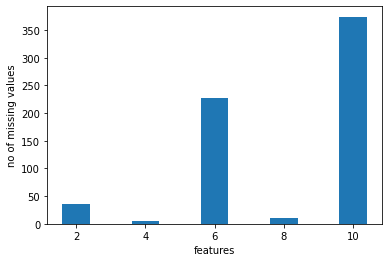

In [12]:
x1=[2,4,6,8,10]
y1=[35,5,227,11,374]
plt.bar(x1,y1,label='missing values')
plt.xlabel("features")
plt.ylabel("no of missing values")
plt.show()


In [13]:
import statistics 
print(statistics.median(dataset['BloodPressure']))
print(statistics.median(dataset['Glucose']))
print(statistics.median(dataset['SkinThickness']))
print(statistics.median(dataset['BMI']))
print(statistics.median(dataset['Insulin']))


72.0
117.0
23.0
32.0
30.5


In [14]:
dataset['BloodPressure']=dataset['BloodPressure'].replace(0,72)
dataset['Glucose']=dataset['Glucose'].replace(0,120.8945)
dataset['SkinThickness']=dataset['SkinThickness'].replace(0,23)
dataset['BMI']=dataset['BMI'].replace(0,32)
dataset['Insulin']=dataset['Insulin'].replace(0,30.5)

In [15]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


Text(0, 0.5, 'Frequency')

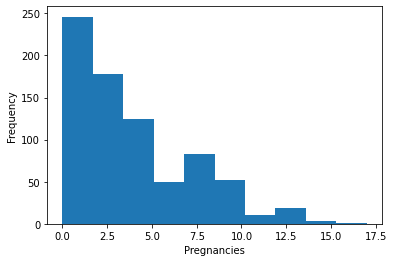

In [16]:
plt.hist(dataset['Pregnancies'])
plt.xlabel("Pregnancies")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

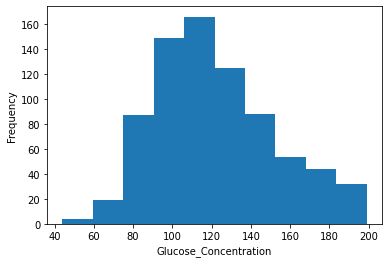

In [17]:
plt.hist(dataset['Glucose'])
plt.xlabel("Glucose_Concentration")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

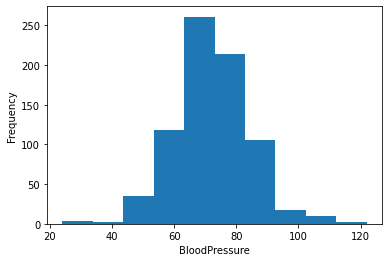

In [18]:
plt.hist(dataset['BloodPressure'])
plt.xlabel("BloodPressure")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

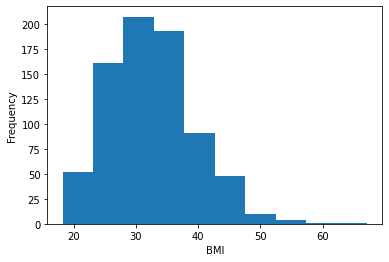

In [19]:
plt.hist(dataset['BMI'])
plt.xlabel("BMI")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

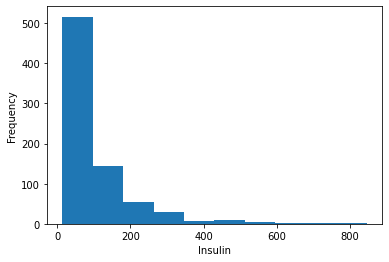

In [20]:
plt.hist(dataset['Insulin'])
plt.xlabel("Insulin")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

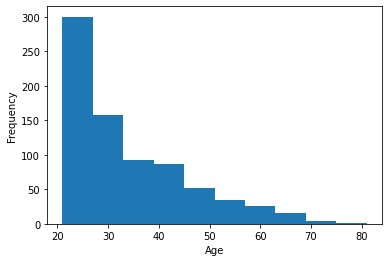

In [21]:
plt.hist(dataset['Age'])
plt.xlabel("Age")
plt.ylabel("Frequency")

In [22]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
att=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
x[att] = sc.fit_transform(dataset[att])
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [23]:
corr = x.corr()

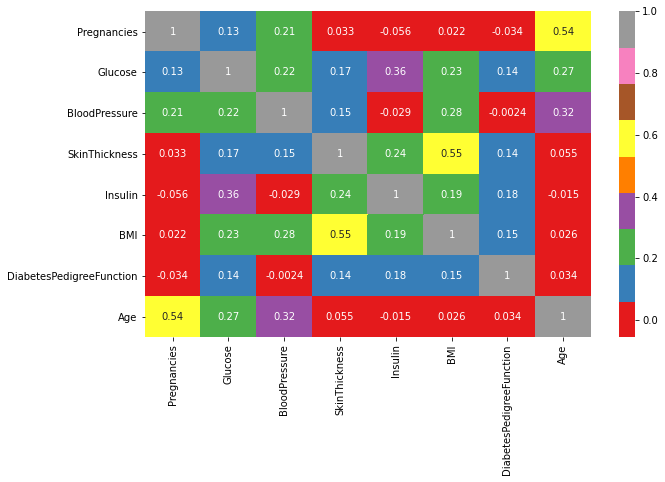

In [24]:
import seaborn as sns
plt.figure(figsize = (10,6))
sns.heatmap(corr,annot = True,cmap = 'Set1')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                   random_state =0 )

# APPLLYING APPROPRIATE ALGORITHMS

In [47]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [48]:
model_log = LogisticRegression(C=10.0)
model_knn = KNeighborsClassifier(n_neighbors=3)
model_svm = SVC(C = 10.0,probability=True) 
model_dt = DecisionTreeClassifier(random_state=1)
model_rf = RandomForestClassifier()
model_nb=GaussianNB()
clf_adb = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_gb = GradientBoostingClassifier(random_state=0)
clfbag = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0).fit(x_train, y_train)


In [49]:
model_log.fit(x_train, y_train) # training model
model_knn.fit(x_train, y_train) # training model
model_svm.fit(x_train, y_train) # training model
model_dt.fit(x_train, y_train) # training model
model_rf.fit(x_train, y_train) # training model
model_nb.fit(x_train, y_train) # traning model
clf_adb.fit(x_train,y_train)
clf_gb.fit(x_train,y_train)
clfbag.fit(x_train,y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=False, random_state=None,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=0, verbose=0, warm_start=False)

In [50]:
y_pred_log = model_log.predict(x_test) # we use this for evaluation
y_pred_knn = model_knn.predict(x_test) # we use this for evaluation
y_pred_svm = model_svm.predict(x_test) # we use this for evaluation
y_pred_dt = model_dt.predict(x_test) # we use this for evaluation
y_pred_rf = model_rf.predict(x_test) # we use this for evaluation
y_pred_nb = model_rf.predict(x_test) # we use this for evaluation
y_pred_adb=clf_adb.predict(x_test)
y_pred_gb=clf_gb.predict(x_test)
y_pred_bag=clfbag.predict(x_test)


In [51]:
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [53]:
cm_log = confusion_matrix(y_test, y_pred_log) # confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn) # confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm) # confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt) # confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf) # confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb) # confusion matrix
cm_adb=confusion_matrix(y_test, y_pred_adb) # confusion matrix
cm_gb=confusion_matrix(y_test, y_pred_gb) # confusion matrix
cm_bag=confusion_matrix(y_test, y_pred_bag) # confusion matrix



cr_log = classification_report(y_test, y_pred_log) # classification report
cr_knn = classification_report(y_test, y_pred_knn) # classification report
cr_svm = classification_report(y_test, y_pred_svm) # classification report
cr_dt = classification_report(y_test, y_pred_dt) # classification report
cr_rf = classification_report(y_test, y_pred_rf) # classification report
cr_nb = classification_report(y_test, y_pred_nb) # classification report
cr_adb=classification_report(y_test, y_pred_adb) # classification report
cr_gb=classification_report(y_test, y_pred_gb) # classification report
cr_bag=classification_report(y_test, y_pred_bag) # classification report

# CONFUSION MATRIXES OF ALL THE ALGORITHMS TO KNOW PERFORMANCE OF EACH AND EVERY ALGORITHM

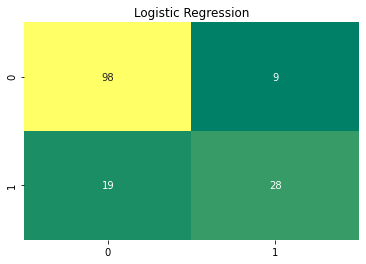

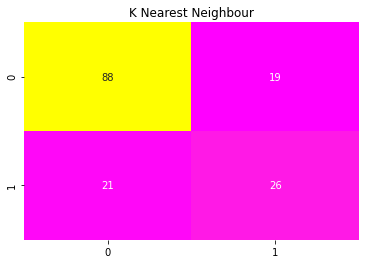

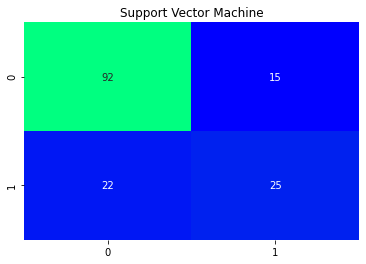

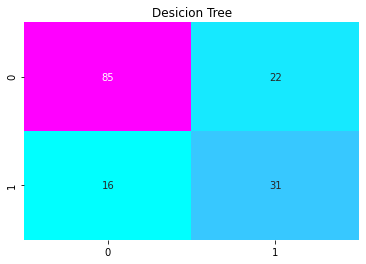

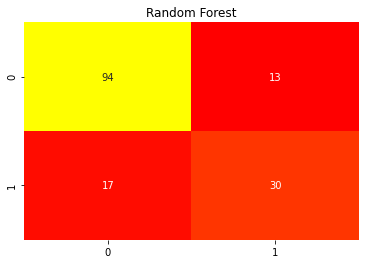

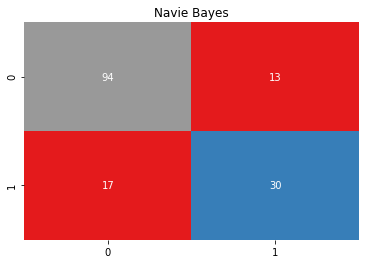

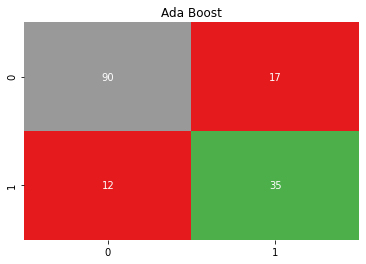

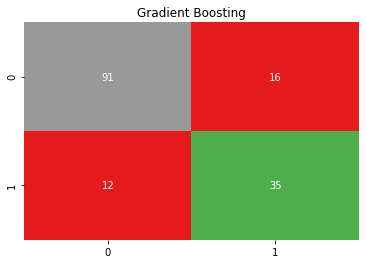

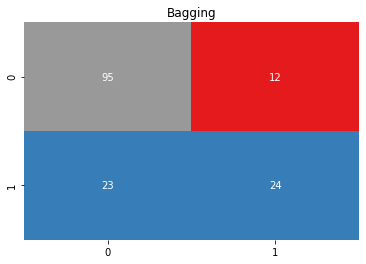

In [54]:
sns.heatmap(cm_log,annot=True,cbar=None,cmap = 'summer')
plt.title('Logistic Regression')
plt.show()
sns.heatmap(cm_knn,annot=True,cbar=None,cmap = 'spring')
plt.title('K Nearest Neighbour')
plt.show()
sns.heatmap(cm_svm,annot=True,cbar=None,cmap = 'winter')
plt.title('Support Vector Machine')
plt.show()
sns.heatmap(cm_dt,annot=True,cbar=None,cmap = 'cool')
plt.title('Desicion Tree')
plt.show()
sns.heatmap(cm_rf,annot=True,cbar=None,cmap = 'autumn')
plt.title('Random Forest')
plt.show()
sns.heatmap(cm_nb,annot=True,cbar=None,cmap = 'Set1')
plt.title('Navie Bayes')
plt.show()
sns.heatmap(cm_adb,annot=True,cbar=None,cmap = 'Set1')
plt.title('Ada Boost')
plt.show()
sns.heatmap(cm_gb,annot=True,cbar=None,cmap = 'Set1')
plt.title('Gradient Boosting')
plt.show()
sns.heatmap(cm_bag,annot=True,cbar=None,cmap = 'Set1')
plt.title('Bagging')
plt.show()

In [55]:
from sklearn.metrics import f1_score

model_log.fit(x_train,y_train)
print("logitic score",model_log.score(x_test,y_test))
print("logistic F1_score:{}".format(f1_score(y_test,y_pred_log)))

model_knn.fit(x_train,y_train)
print("knn score",model_knn.score(x_test,y_test))
print("knn F1_score:{}".format(f1_score(y_test,y_pred_knn)))

model_svm.fit(x_train,y_train)
print("svm score",model_svm.score(x_test,y_test))
print("svm F1_score:{}".format(f1_score(y_test,y_pred_svm)))

model_dt.fit(x_train,y_train)
print("dct score",model_dt.score(x_test,y_test))
print("dct F1_score:{}".format(f1_score(y_test,y_pred_dt)))

model_rf.fit(x_train,y_train)
print("random forest score",model_rf.score(x_test,y_test))
print("random forest F1_score:{}".format(f1_score(y_test,y_pred_rf)))

model_nb.fit(x_train,y_train)
print("nb score",model_nb.score(x_test,y_test))
print("nb F1_score:{}".format(f1_score(y_test,y_pred_nb)))



clf_adb.fit(x_train,y_train)
print("adaboost score",clf_adb.score(x_test,y_test))
print("nb F1_score:{}".format(f1_score(y_test,y_pred_adb)))

clf_gb.fit(x_train,y_train)
print("Gradient Boosting score",clf_gb.score(x_test,y_test))
print("GB F1_score:{}".format(f1_score(y_test,y_pred_gb)))

clfbag.fit(x_train,y_train)
print("Bagging score",clfbag.score(x_test,y_test))
print("Bagging F1_score:{}".format(f1_score(y_test,y_pred_bag)))



logitic score 0.8181818181818182
logistic F1_score:0.6666666666666666
knn score 0.7402597402597403
knn F1_score:0.5652173913043478
svm score 0.7597402597402597
svm F1_score:0.5747126436781609
dct score 0.7532467532467533
dct F1_score:0.62
random forest score 0.8181818181818182
random forest F1_score:0.6666666666666666
nb score 0.7792207792207793
nb F1_score:0.6666666666666666
adaboost score 0.8116883116883117
nb F1_score:0.7070707070707072
Gradient Boosting score 0.8181818181818182
GB F1_score:0.7142857142857144
Bagging score 0.7727272727272727
Bagging F1_score:0.5783132530120482


In [56]:
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score 

# TODO: Initialize the classifier
clf = LogisticRegression(random_state = 100)



# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C' : [10.0], 'penalty' : ["l2"]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(x_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(x_train, y_train)).predict(x_test)
best_predictions = best_clf.predict(x_test)

# Report the before-and-afterscores
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Final F-score on the testing data: 0.7179


# PERFORMANCE OF ALL THE ALGORITHMS IN GRAPHICAL MANNER

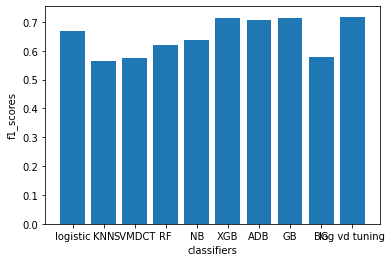

In [57]:
lab=["logistic","KNN","SVM""DCT","RF","NB","XGB","ADB","GB","BG","log vd tuning"]
f1scores=[0.6666666666666666,0.5652173913043478,0.5747126436781609,0.62,0.6363636363636364,0.7142857142857144,0.7070707070707072,0.7142857142857144,0.5783132530120482,
          0.7179]
plt.bar(lab,f1scores)
plt.xlabel("classifiers")
plt.ylabel("f1_scores")
plt.show()

In [58]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,0.411765,0.683871,0.551020,0.239130,0.134615,0.347648,0.262169,0.550000
118,0.235294,0.341935,0.367347,0.173913,0.019832,0.204499,0.155850,0.016667
247,0.000000,0.780645,0.673469,0.282609,0.800481,0.697342,0.149018,0.033333
157,0.058824,0.419355,0.326531,0.152174,0.145433,0.143149,0.322374,0.033333
468,0.470588,0.490323,0.489796,0.173913,0.019832,0.241309,0.044833,0.283333


In [59]:
np.array(best_clf.predict([[0.411765,0.683871,0.551020,0.239130,0.134615,0.347648,0.155850,0.016667]]))

array([1])

# REAL TIME PREDICTION ON PATIENT TEST REPORT

In [60]:
print("enter the pregencies,glucose,BP,Skinthickness,insulin ,BMI, Dpf,AGE values in a order to predict outcome:")
best_clf.predict(sc.transform(np.array([[5,148.0,	72,	35,	30.5,	33.6,	0.627,	50]])))

enter the pregencies,glucose,BP,Skinthickness,insulin ,BMI, Dpf,AGE values in a order to predict outcome:


array([1])

In [61]:
from sklearn.ensemble import AdaBoostClassifier
clf_adb = AdaBoostClassifier(n_estimators=100, random_state=0)

In [40]:
clf_adb.fit(x_train,y_train)
adbpred=clf_adb.predict(x_test)
clf_adb.score(x_test,y_test)

0.8116883116883117

In [42]:
print(classification_report(y_test, adbpred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       107
           1       0.67      0.74      0.71        47

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.82      0.81      0.81       154

